In [20]:
#5.106

x_0 = 1
x1 = 0.83756544

f = (4*(x1**3)) - (4*x1) + 1

print(f)

2.083917660655743e-08


In [ ]:
#5.149

f0 = (x_0**2) - (2*x_0) - (2*(x_1**2)) + x_1
f1 = (x_0**2) + (x_0) - (2*(x_1**2)) - ((1.5)*x_1) - 0.05

In [28]:
import numpy as np
from jacobi import termcrit

def nonlin_func(x):
    x0, x1 = x[0], x[1]

    return np.array([
        (2*x0) - 2 - (400*x0*(x1-(x0**2))),
        200*(x1-(x0**2))
    ])

x_test = np.array([0.5, 0.6])
print(nonlin_func(x_test))


def jacobian(vec_fld, x, h=1e-6):
    # Fetch the vector dimension
    n = x.size
    
    # n-dimensional vector has nxn jacobian
    Jf = np.zeros((n,n))
    
    # Identity matrix. Convenient for picking
    # which dimension we will advance by h
    iden = np.eye(n)
    
    # get vector value at x
    fs0 = vec_fld(x)

    for j in range(n):
        fs1 = vec_fld(x + iden[:,j]*h)
        Jf[:,j] = (fs1 - fs0)/h

    return Jf, fs0

print(jacobian(nonlin_func, x_test))

def multi_newton(input_func, jac, xolds, kmax=500, tol = 1.e-8):
    ## Forgot to add termination condition here, please add it.
    for k in range(1, kmax):
        Jf, fs_xolds = jacobian(input_func, xolds)
        xnews = xolds + np.linalg.solve(Jf, -fs_xolds)
       
        err = termcrit(xolds, xnews)
        print(k, xnews, err)
        if err < tol:
            break
        
        xolds = np.copy(xnews)

    return xnews

root = multi_newton(nonlin_func, jacobian, np.array([1., 0.5]))
print(f"Root found at {root}")
print(f"f(root) is {nonlin_func(root)})")

[-71.  70.]
(array([[  62.0006    , -200.00000001],
       [-200.00020001,  200.00000001]]), array([-71.,  70.]))
1 [1. 1.] 0.49999999999170086
2 [1. 1.] 1.659827830735594e-11
Root found at [1. 1.]
f(root) is [0. 0.])


1 [-0.99501246  0.99002493] 2.01508810823545
2 [ 0.99091218 -2.96198776] 3.338381311664893
3 [0.99092369 0.98192975] 4.0165082069771545
4 [0.9999964 0.9999105] 0.027055099285827663
5 [0.99999994 0.99999988] 9.292195189611201e-05
6 [1. 1.] 1.7894923954476052e-07
7 [1. 1.] 7.149170144771347e-11
Root found at [1. 1.] => L2 = 1.9095836023552692e-14
1 [ 1.00080032 -3.00159864] 3.3323561219512285
2 [1.00079932 1.00159928] 3.996806904409586
3 [1.00000032 1.        ] 0.0023982799290287356
4 [1. 1.] 3.204702573879864e-07
5 [1. 1.] 5.059290764108368e-10
Root found at [1. 1.] => L2 = 2.281840818028513e-13
1 [1. 1.] 2.0000000000663936
2 [1. 1.] 6.639344629633115e-11
Root found at [1. 1.] => L2 = 0.0
1 [1.e+00 1.e-06] 2.0
2 [1. 1.] 0.9999990000320025
3 [1. 1.] 8.812666152381859e-10
Root found at [1. 1.] => L2 = 4.1354941833285496e-13
1 [1. 1.] 0.0
Root found at [1. 1.] => L2 = 0.0
1 [-0.99501246  0.99002493] 2.01508810823545
2 [ 0.99091218 -2.96198776] 3.338381311664893
3 [0.99092369 0.98192975] 4.

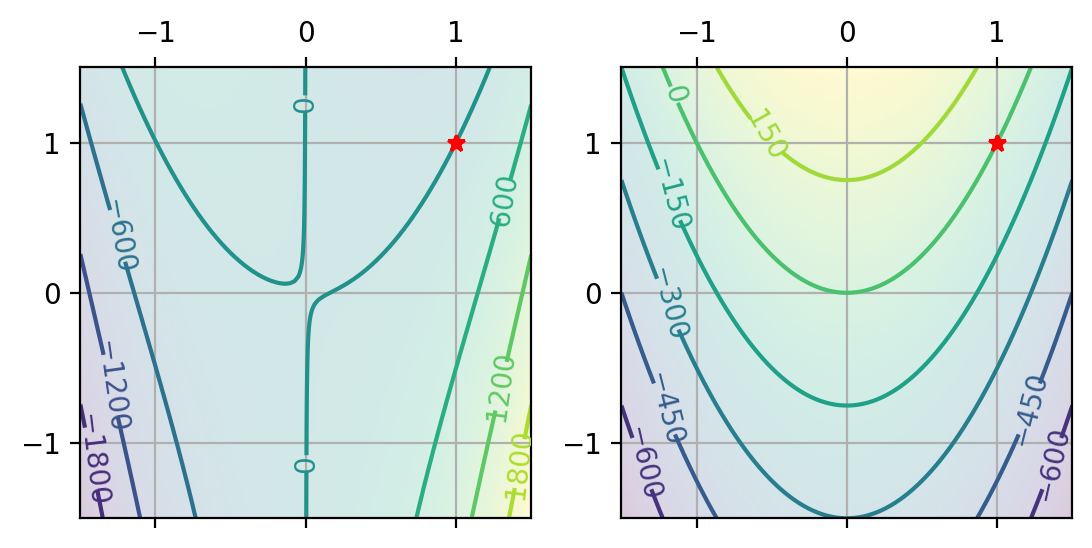

In [30]:
import matplotlib.pyplot as plt

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
output = nonlin_func(np.array([X, Y]))

fig, axs = plt.subplots(1, 2, dpi=200)
my_extent = [min(x), max(x), min(y), max(y)]
axs[0].matshow(output[0], origin="lower", extent=my_extent, alpha=0.2)
csx = axs[0].contour(X, Y, output[0])
axs[0].clabel(csx)

axs[1].matshow(output[1], origin="lower", extent=my_extent, alpha=0.2)
csy = axs[1].contour(X, Y, output[1])
axs[1].clabel(csy)

for ax in axs:
    ax.grid(True)
    ## Try out different x0 and see where they will land
    for x0 in [[-1, -1],[-1, 1], [1, -1], [0,0], [1,1]]:
        root = multi_newton(nonlin_func, jacobian, np.array(x0))
        print(f"Root found at {root} => L2 = {np.linalg.norm(nonlin_func(root))}")
        ax.plot(root[0], root[1], "r*")

In [78]:
from math import sqrt

def phi(x):
    return (x**4) - (9*(x**3)) + (25*(x**2)) - (24*x) + 4

def golden(phi, x0, x1, kmax=200, tol=1.e-8):
    varphi = 0.5*(1 + sqrt(5))
    for k in range(1,kmax):
        x2 = x0 + (x1-x0)/(varphi+1)
        x3 = x0 + (x1-x0)*varphi/(varphi+1)
        
        if phi(x3) < phi(x2):
            x0 = x2
        else:
            x1 = x3
            
        xnew = (x0+x1)/2
        xdiff = abs(x1-x0)
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"

        if abs(xdiff) < tol:
            break
    else:
        xnew = None
    return xnew

if __name__ == '__main__':
    val = golden(phi,0.5,1.5); print(val)
    val = golden(phi,3.5,5); print(val)

0.749999981905141
3.9999999349494955


<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_397273/2879158864.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Visualization of $\phi(x)$')


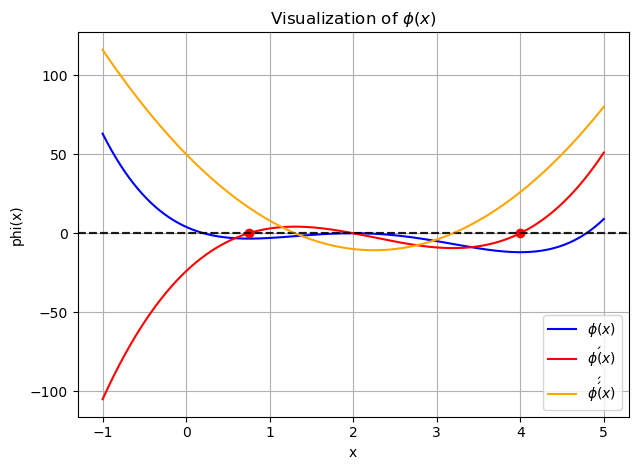

<Figure size 640x480 with 0 Axes>

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x):
    return (x**4) - (9*(x**3)) + (25*(x**2)) - (24*x) + 4

def phiprime(x):
    return (4*x**3) - (27*(x**2)) + (50*(x)) - (24)

def phidprime(x):
    return (12*x**2) - (54*(x)) + (50)

# Create x values
x = np.linspace(-1, 5, 1000)
y = phi(x)
yprime = phiprime(x)
ydprime = phidprime(x)

# Plot
plt.plot(x, y, label=r'$\phi(x)$', color='blue')
plt.title('Visualization of $\phi(x)$')
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.plot(0.7499999938244859, 0, 'ro')
plt.plot(3.9999999349494955, 0, 'ro')
plt.tight_layout()
plt.grid(True)
plt.legend()

plt.plot(x, yprime, label=r'$\phi\'(x)$', color='red')
plt.xlabel('x')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True)
plt.legend()

plt.plot(x, ydprime, label=r'$\phi\'\'(x)$', color='orange')
plt.xlabel('x')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True)
plt.legend()

plt.show()
plt.savefig("5.91 final plot.png")

4.72655589854176e-09
4.1033248974478145


<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_397273/3411423449.py:53: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Visualization of $\phi(x)$')


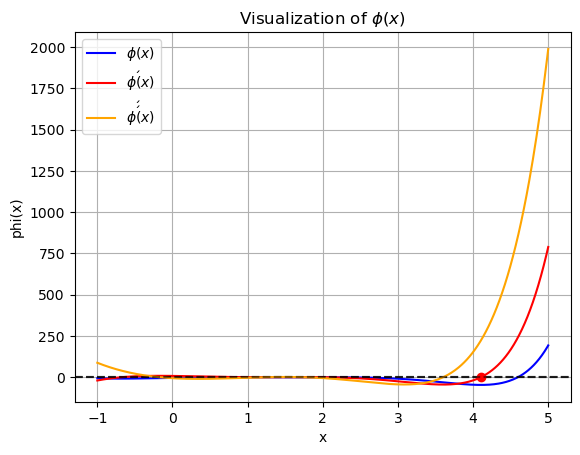

<Figure size 640x480 with 0 Axes>

In [104]:
import numpy as np
from math import sqrt, exp

def phi(x):
    return (-x**5) + (4*x**4) - (4*x**3) + ((x**2)*np.exp(x)) \
           - (2*x**2) - (4*x*np.exp(x)) + (8*x) + (4*np.exp(x)) - 8

def golden(phi, x0, x1, kmax=200, tol=1.e-8):
    varphi = 0.5*(1 + sqrt(5))
    for k in range(1,kmax):
        x2 = x0 + (x1-x0)/(varphi+1)
        x3 = x0 + (x1-x0)*varphi/(varphi+1)
        
        if phi(x3) < phi(x2):
            x0 = x2
        else:
            x1 = x3
            
        xnew = (x0+x1)/2
        xdiff = abs(x1-x0)
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"

        if abs(xdiff) < tol:
            break
    else:
        xnew = None
    return xnew

if __name__ == '__main__':
    val = golden(phi,0.,3.5); print(val)
    val = golden(phi,3.5,5); print(val)

import numpy as np
import matplotlib.pyplot as plt


def phiprime(x):
    return (-5*x**4) + (16*x**3) - (12*x**2) \
           + (2*x*np.exp(x) + x**2*np.exp(x)) - (4*x) \
           - (4*np.exp(x) + 4*x*np.exp(x)) + 8 + (4*np.exp(x))

def phidprime(x):
    return -20*x**3 + 48*x**2 - 24*x + (x**2*np.exp(x) - 2*np.exp(x)) - 4

# Create x values
x = np.linspace(-1, 5, 500)
y = phi(x)
yprime = phiprime(x)
ydprime = phidprime(x)

# Plot
plt.plot(x, y, label=r'$\phi(x)$', color='blue')
plt.title('Visualization of $\phi(x)$')
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True)

plt.legend()

plt.plot(x, yprime, label=r'$\phi\'(x)$', color='red')
plt.xlabel('x')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.plot(4.1033248974478145, 0, 'ro')
plt.grid(True)
plt.legend()

plt.plot(x, ydprime, label=r'$\phi\'\'(x)$', color='orange')
plt.xlabel('x')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("5.91 final plot.png")

In [106]:
import numpy as np
from math import sqrt, exp

def phi(x):
    return (-x**5) + (4*x**4) - (4*x**3) + ((x**2)*np.exp(x)) \
           - (2*x**2) - (4*x*np.exp(x)) + (8*x) + (4*np.exp(x)) - 8

def golden(phi, x0, x1, kmax=200, tol=1.e-8):
    varphi = 0.5*(1 + sqrt(5))
    for k in range(1,kmax):
        x2 = x0 + (x1-x0)/(varphi+1)
        x3 = x0 + (x1-x0)*varphi/(varphi+1)
        
        if phi(x3) < phi(x2):
            x0 = x2
        else:
            x1 = x3
            
        xnew = (x0+x1)/2
        xdiff = abs(x1-x0)
        rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"

        if abs(xdiff) < tol:
            break
    else:
        xnew = None
    return xnew

if __name__ == '__main__':
    val = golden(phi,3.5,5); print(val)

4.1033248974478145
